<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

На всякий случай ноутбук в колабе также здесь - https://colab.research.google.com/drive/1Kcalmq3YssC_YiiDu_Fs-qd46fsxLncw?usp=sharing

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Классификация звуков</b></h3>

**Автор**: Ермекова Асель


В этом задании вам предстоит решить задачу классификации звуков на основе wav файлов и использовании различных аугментаций данных.

Есть две части этого домашнего задания.

### 1 Часть. Отправить ваши предсказания в Stepik.
Результат вашей лучшей модели будет оцениваться на тестовой выборке по метрике Accuracy. Эта часть оценивается до 5 баллов.

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.70$ --- 4 балла

3) $0.70 > score \geqslant 0.60$ --- 3 балла

4) $0.60 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.25$ --- 1 балл

6) $0.25 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на три части.

1. `train.csv`. На этом наборе данных вам необходимо создать и обучить модель.
2. `valid.csv`. На этом наборе данных вы можете валидировать вашу модель.
3. `test.csv`. Предсказания для этого набора необходимо записать в файл `submission.csv` и сдать в соответствующий шаг на Stepik. Количество попыток ограничено до 100 штук. В конце ноутбука есть пример оформления файла посылки.

### 2 Часть. Сделать полноценный отчет о вашей работе (5 баллов).
Опишите итеративный процесс улучшения метрики:
* как вы обработали данные, какие аугментации добавляли, что сработало, а что нет.
* какие архитектуры модели попробовали и какие результаты получились.

В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается до 5 баллов.

### Peer-review
Вторая часть будет проверяться в формате peer-review, т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.


### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


# **Environmental Sound Classification**

## **Task Overview**

В этом домашнем задании вам предстоит работать с датасетом различных звуков окружающей среды (собака, дождь, плач ребёнка и т. д.).

### **Part 1: Create Dataset**

Первым делом давайте скачаем датасет и прилагающие csv файлы с метками класса.

In [1]:
!gdown 1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO # sound_classification_dataset.zip
!gdown 1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT # train.csv
!gdown 1my0RPDQdTxvCGmnZei06tiXgKko3R4o4 # valid.csv
!gdown 1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks # test.csv

Downloading...
From (original): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO
From (redirected): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO&confirm=t&uuid=d00f3201-7647-4620-9d7c-2200bd082942
To: /content/sound_classification_dataset.zip
100% 645M/645M [00:07<00:00, 82.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT
To: /content/train.csv
100% 3.09k/3.09k [00:00<00:00, 15.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1my0RPDQdTxvCGmnZei06tiXgKko3R4o4
To: /content/valid.csv
100% 1.06k/1.06k [00:00<00:00, 5.81MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks
To: /content/test.csv
100% 719/719 [00:00<00:00, 2.68MB/s]


Разархивируйте zip файл, где содержатся wav файлы датасета.

In [2]:
!unzip /content/sound_classification_dataset.zip

Archive:  /content/sound_classification_dataset.zip
   creating: content/sound_classification_dataset/
  inflating: content/sound_classification_dataset/1-61261-A-44.wav  
  inflating: content/sound_classification_dataset/2-104105-A-19.wav  
  inflating: content/sound_classification_dataset/3-150363-A-38.wav  
  inflating: content/sound_classification_dataset/1-18074-A-6.wav  
  inflating: content/sound_classification_dataset/5-161270-A-33.wav  
  inflating: content/sound_classification_dataset/5-221529-A-39.wav  
  inflating: content/sound_classification_dataset/2-61618-A-46.wav  
  inflating: content/sound_classification_dataset/1-46274-A-18.wav  
  inflating: content/sound_classification_dataset/1-69760-A-16.wav  
  inflating: content/sound_classification_dataset/2-64963-A-15.wav  
  inflating: content/sound_classification_dataset/2-108766-A-9.wav  
  inflating: content/sound_classification_dataset/4-165845-A-45.wav  
  inflating: content/sound_classification_dataset/5-235644-A-30.w

In [ ]:
# косяк архивации (в колабе user путь /content и в архиве папка content)
!mv /content/content/sound_classification_dataset /content/sound_classification_dataset

In [3]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df.head()

,filename,category
0,1-100032-A-0.wav,dog
1,1-110389-A-0.wav,dog
2,1-17367-A-10.wav,rain
3,1-187207-A-20.wav,crying_baby
4,1-211527-A-20.wav,crying_baby


In [7]:
train_df["category"].value_counts()

,count
category,
dog,24
rain,24
crying_baby,24
clock_tick,24
sneezing,24


Для этого задания при создании датасета вам нужно сделать обработку аудио данных следующим образом:
* **Sample rate --> 16000**: ресэмплируйте оригинальный `sample_rate` в `sample_rate = 16000`
* **Stereo --> Mono**: преобразуйте многоканальное аудио в моноканальное
* **Length = X secs:** чтобы суметь создать батч, вам необходимо, чтобы длина всех ваших аудиозаписей была одинаковой, поэтому вам нужно зафиксировать длину всех аудиозаписей, и если аудио меньше заданной длины, то сделайте паддинг, если больше, обрежьте аудио до заданной длины.

* **Audio Augmentation:** используйте разные аугментации. Вы можете воспользоваться библиотеками:
  * [torchaudio.transforms](https://docs.pytorch.org/audio/main/transforms.html)
  * [torch_audiomentations](https://github.com/iver56/torch-audiomentations)

**ВАЖНО**: в этом домашнем задании вам нельзя переводить `wav` в мелспектрограммы.

Внизу для удобства предоставлен псевдокод, который можно заполнить необходимыми функциями, но вы можете видоизменять его как вам будет удобно.

In [8]:
import torch
import torchaudio
from torch.utils.data import Dataset
import pandas as pd
import os

# note: вообще кажется что huggingface datasets поудобнее будет
class SimpleAudioDataset(Dataset):
    """A dataset to load, preprocess, and augment audio files."""

    def __init__(
        self,
        df,
        audio_dir="/content/sound_classification_dataset",
        target_sr=16000,
        duration_sec=4,
        do_augmentation=False,
        classes=None
    ):
        # here is your code
        self.df = df
        self.audio_dir = audio_dir
        self.target_sr = target_sr
        self.duration_sec = duration_sec
        self.target_length = target_sr * duration_sec
        self.do_augmentation = do_augmentation

        if 'category' in df.columns:
            self.classes = sorted(df['category'].unique())
            self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        elif classes is not None:
            self.classes = classes
            self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        else:
            self.classes = []
            self.class_to_idx = {}

        if self.do_augmentation:
            self.time_shift = torchaudio.transforms.TimeStretch(fixed_rate=1.1)
            self.add_noise = lambda x: x + torch.randn_like(x) * 0.005

    def __len__(self):
        return len(self.df) # here is your code

    def __getitem__(self, index):
        # 1. Get the file path and label
        row = self.df.iloc[index]
        audio_file_path = os.path.join(self.audio_dir, row['filename'])

        # Handle test set without labels
        if 'category' in row:
            label = self.class_to_idx[row['category']]
        else:
            label = -1  # Placeholder for test set

        # 2. LOAD: Load the raw audio file
        signal, sr = torchaudio.load(audio_file_path)

        # 3. PREPROCESS: Apply the preprocessing steps
        signal = self._resample(signal, sr)
        signal = self._stereo_to_mono(signal)
        signal = self._cut_or_pad(signal)

        # 4. AUGMENT: Apply augmentations only if training
        if self.do_augmentation:
            signal = self._augmentation(signal)

        signal = signal.squeeze(0)

        # 5. RETURN: We now have a clean, standardized waveform and its label
        return signal, label


    # --- The Core Preprocessing Functions ---
    def _resample(self, signal, original_sr):
        # here is your code
        if original_sr != self.target_sr:
            resampler = torchaudio.transforms.Resample(original_sr, self.target_sr)
            signal = resampler(signal)
        return signal

    def _stereo_to_mono(self, signal):
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal

    def _cut_or_pad(self, signal):
        current_length = signal.shape[1]
        if current_length > self.target_length:
            signal = signal[:, :self.target_length]
        elif current_length < self.target_length:
            padding = self.target_length - current_length
            signal = torch.nn.functional.pad(signal, (0, padding))
        return signal

    def _augmentation(self, signal):
        # Apply random augmentations with 50% probability
        if torch.rand(1) > 0.5:
            signal = self.add_noise(signal)
        if torch.rand(1) > 0.5:
            # Volume adjustment
            signal = signal * (0.8 + torch.rand(1) * 0.4)
        return signal

In [9]:
train_dataset = SimpleAudioDataset(train_df, do_augmentation=True)
valid_dataset = SimpleAudioDataset(valid_df, do_augmentation=False)

### **Part 2: Building a Model that Learns from Waveforms**

В этом разделе вам нужно написать архитектуру по вашему выбору, которая будет решать задачу классификации на 5 классов.

In [10]:
import torch.nn as nn

class SoundClassificatonModel(nn.Module):
    """A simple model that processes raw waveforms."""

    def __init__(self, input_size=64000, num_classes=5):
        super().__init__()

        # 1D CNN architecture for waveform processing
        self.conv_layers = nn.Sequential(
            # First conv block
            nn.Conv1d(1, 32, kernel_size=80, stride=4),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.MaxPool1d(4),

            # Second conv block
            nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(4),

            # Third conv block
            nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(4),

            # Fourth conv block
            nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # Add channel dimension if needed
        if x.dim() == 2:
            x = x.unsqueeze(1)

        x = self.conv_layers(x)
        x = x.squeeze(-1)
        x = self.classifier(x)
        return x

### **Part 3: Training and Evaluation**

В этом разделе вам нужно написать код тренировки и запустить саму тренировку и вывести лучшие значения метрики качества на train и valid данных. Для вашего удобства написана функция отображения значений лоссов и метрики accuracy.

In [11]:
def plot_metrics(train_losses, train_accuracies, test_losses, test_accuracies):
    """
    Plot training and validation metrics
    """
    epochs = range(1, len(train_losses) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
    ax1.plot(epochs, test_losses, 'r-', label='Test Loss', linewidth=2)
    ax1.set_title('Training and Test Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(epochs, train_accuracies, 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs, test_accuracies, 'r-', label='Valid Accuracy', linewidth=2)
    ax2.set_title('Training and Valid Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

Epoch 50/50 - Train Loss: 0.2071, Train Acc: 91.67%, Valid Loss: 0.3480, Valid Acc: 92.50%


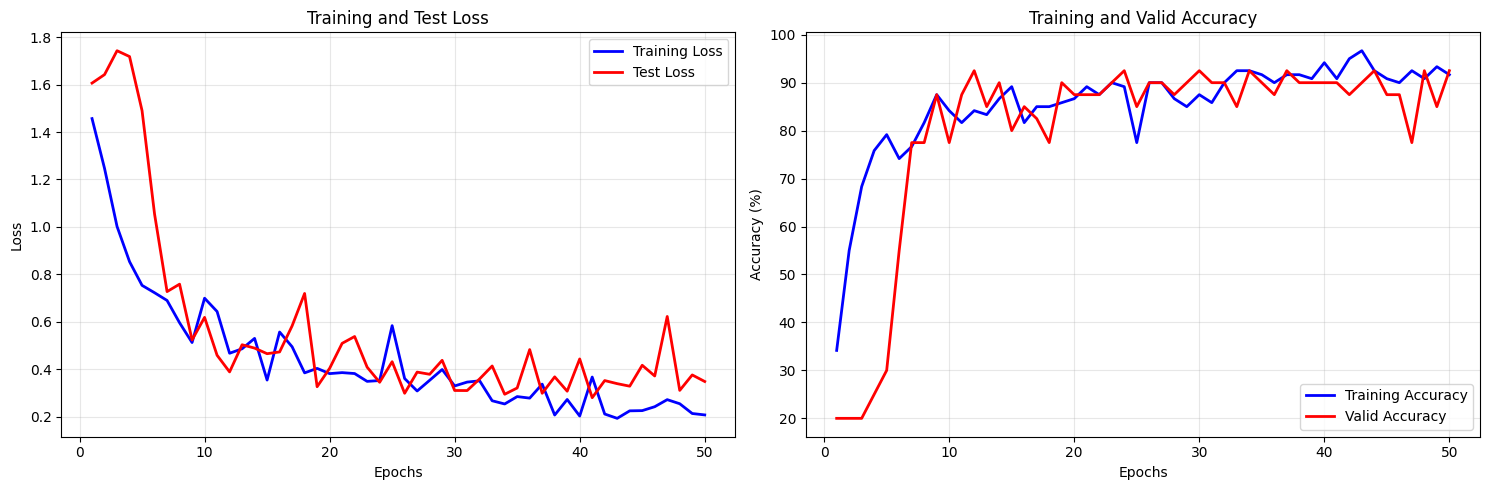

In [13]:
from torch.utils.data import DataLoader
from IPython.display import clear_output


# Initialize datasets & dataloaders
train_data = train_dataset
valid_data = valid_dataset

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=16, shuffle=False)
# Create test dataset with classes from train dataset
test_dataset = SimpleAudioDataset(test_df, do_augmentation=False, classes=train_dataset.classes)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Model, Loss, Optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SoundClassificatonModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

# Увеличено до 50 эпох для лучших результатов
# на основе уже проделанных экспериментов: достаточно даже остановиться в районе 24,
# но было лень добавлять early stopping
n_epochs = 50
for epoch in range(n_epochs):

    # Train
    model.train()
    epoch_train_loss = 0
    epoch_train_correct = 0
    epoch_train_total = 0

    for signals, labels in train_loader:

        # load data to device
        signals, labels = signals.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        predictions = model(signals)
        train_loss = criterion(predictions, labels)

        # Calculate accuracy
        _, predicted = torch.max(predictions.data, 1)
        epoch_train_total += labels.size(0)
        epoch_train_correct += (predicted == labels).sum().item()
        epoch_train_loss += train_loss.item()

        # Backward pass
        train_loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    epoch_valid_loss = 0
    epoch_valid_correct = 0
    epoch_valid_total = 0

    with torch.no_grad():
        for signals, labels in valid_loader:
            # load data to device
            signals, labels = signals.to(device), labels.to(device)

            # Forward pass
            predictions = model(signals)
            valid_loss = criterion(predictions, labels)

            # Calculate accuracy
            _, predicted = torch.max(predictions.data, 1)
            epoch_valid_total += labels.size(0)
            epoch_valid_correct += (predicted == labels).sum().item()
            epoch_valid_loss += valid_loss.item()

    # Calculate average test loss and accuracy for this epoch
    epoch_train_loss = epoch_train_loss / len(train_loader)
    epoch_train_acc = 100 * epoch_train_correct / epoch_train_total

    epoch_valid_loss = epoch_valid_loss / len(valid_loader)
    epoch_valid_acc = 100 * epoch_valid_correct / epoch_valid_total

    # Store metrics
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    valid_losses.append(epoch_valid_loss)
    valid_accuracies.append(epoch_valid_acc)

    print(f"Epoch {epoch+1}/{n_epochs} - Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, Valid Loss: {epoch_valid_loss:.4f}, Valid Acc: {epoch_valid_acc:.2f}%")

    plot_metrics(train_losses, train_accuracies, valid_losses, valid_accuracies)
    clear_output(wait=True)

In [19]:
train_accuracies = np.array(train_accuracies)
valid_accuracies = np.array(valid_accuracies)

In [21]:
print("Train Accuracy (max) = ", train_accuracies.max())
print("Valid Accuracy (max) = ", valid_accuracies.max())
print("Train Accuracy (avg) = ", train_accuracies.mean())
print("Valid Accuracy (avg) = ", valid_accuracies.mean())

Train Accuracy (max) =  96.66666666666667
Valid Accuracy (max) =  92.5
Train Accuracy (avg) =  85.46666666666668
Valid Accuracy (avg) =  80.4


### **Part 4. Test Demo for ESC-50**

Для вашего удобства предоставляется код для тестирования модели и отрисовки формы сигналов, прогноза и топ-5 наиболее вероятных классов.

Using device: cuda
ESC-50 Audio Classification Demo!


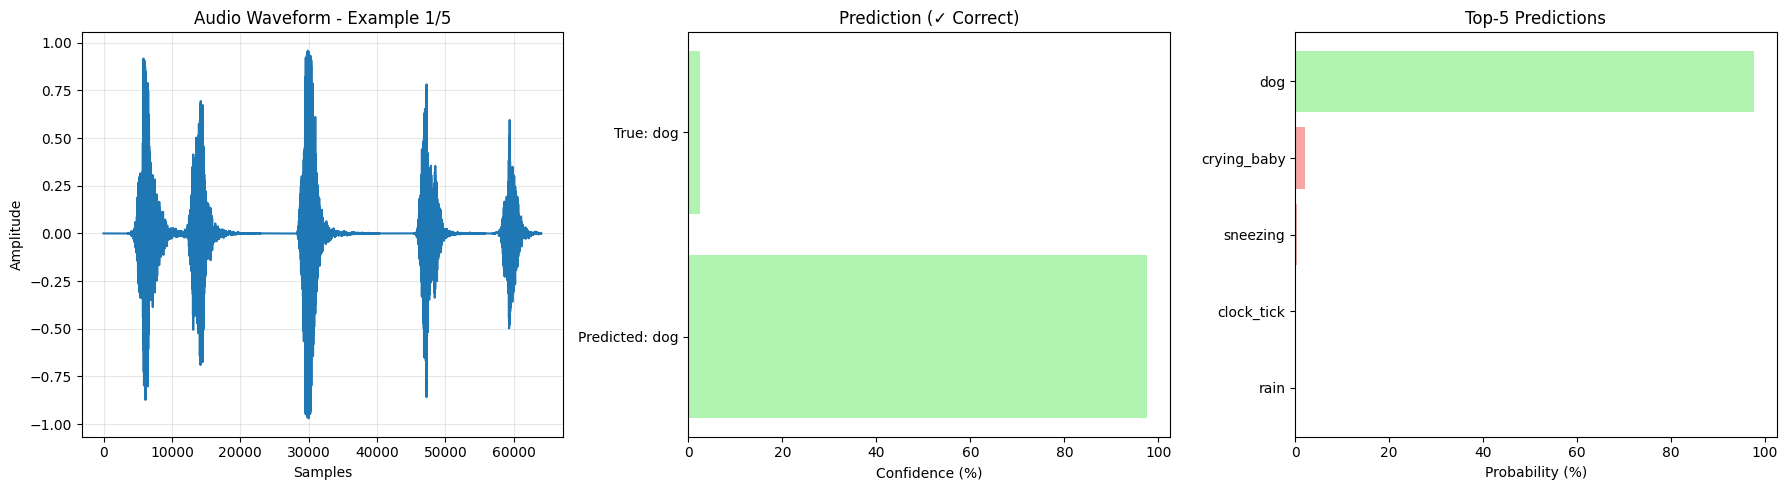

Playing: dog


Prediction: dog (97.59%)
True label: dog
Correct: True


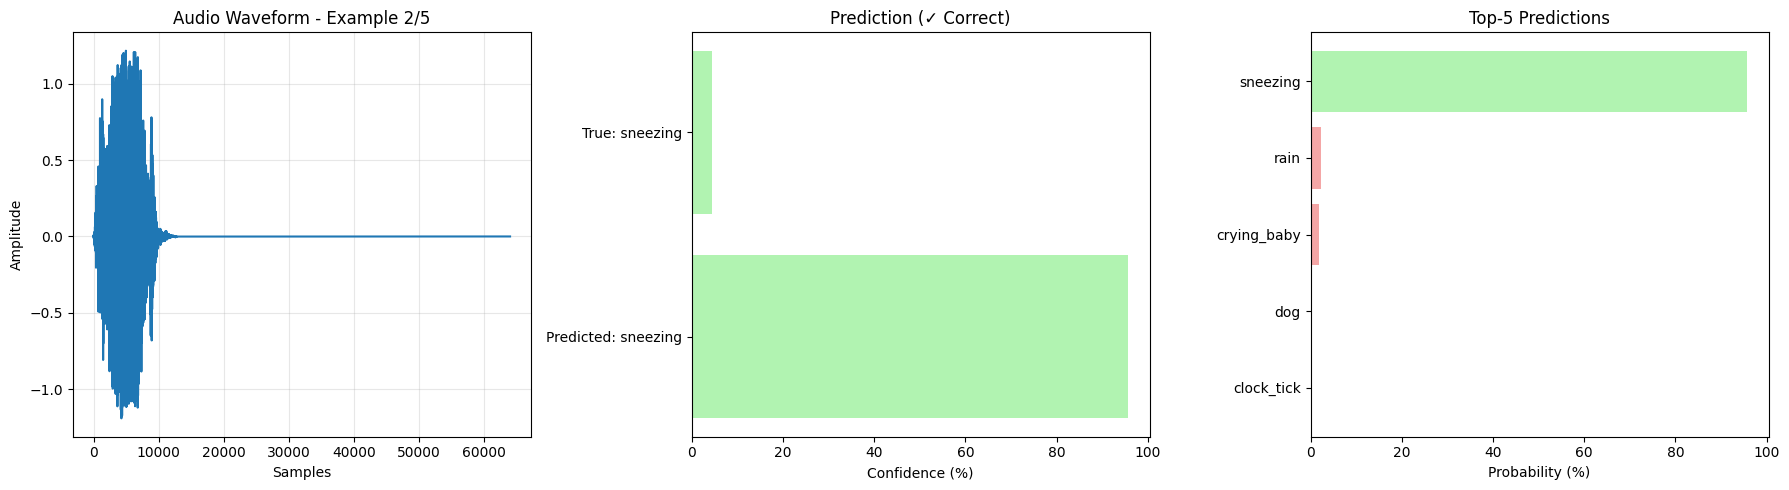

Playing: sneezing


Prediction: sneezing (95.64%)
True label: sneezing
Correct: True


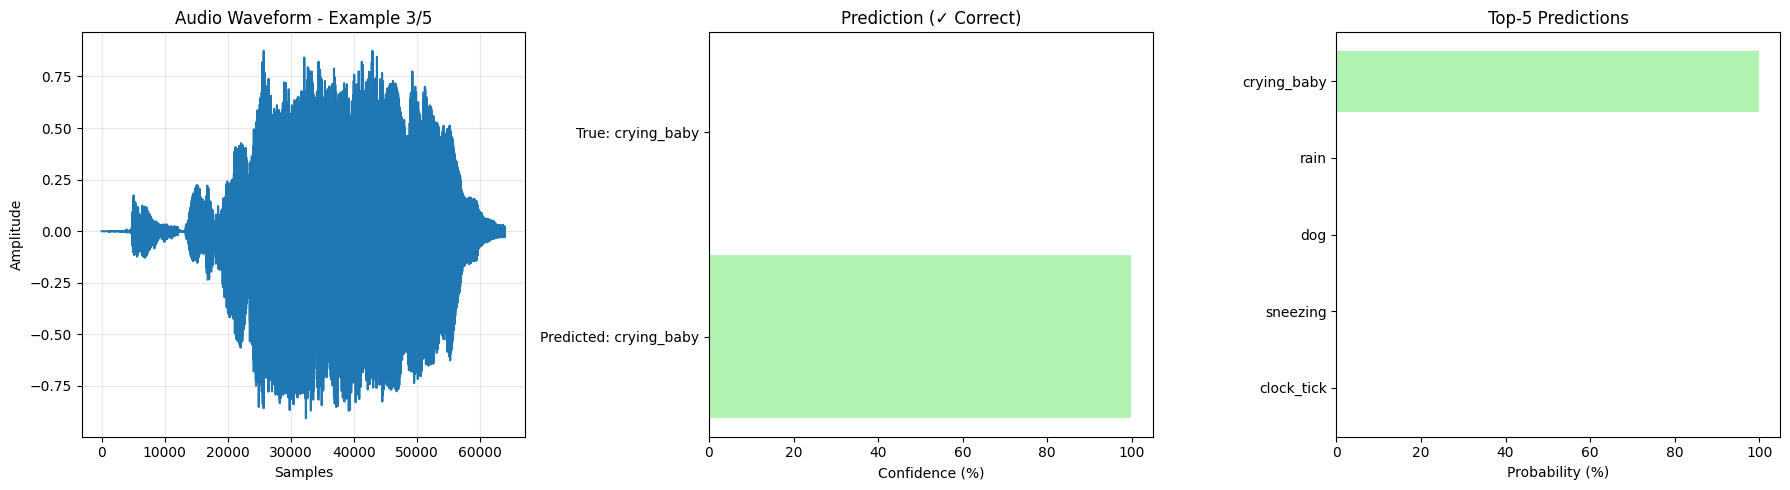

Playing: crying_baby


Prediction: crying_baby (99.93%)
True label: crying_baby
Correct: True


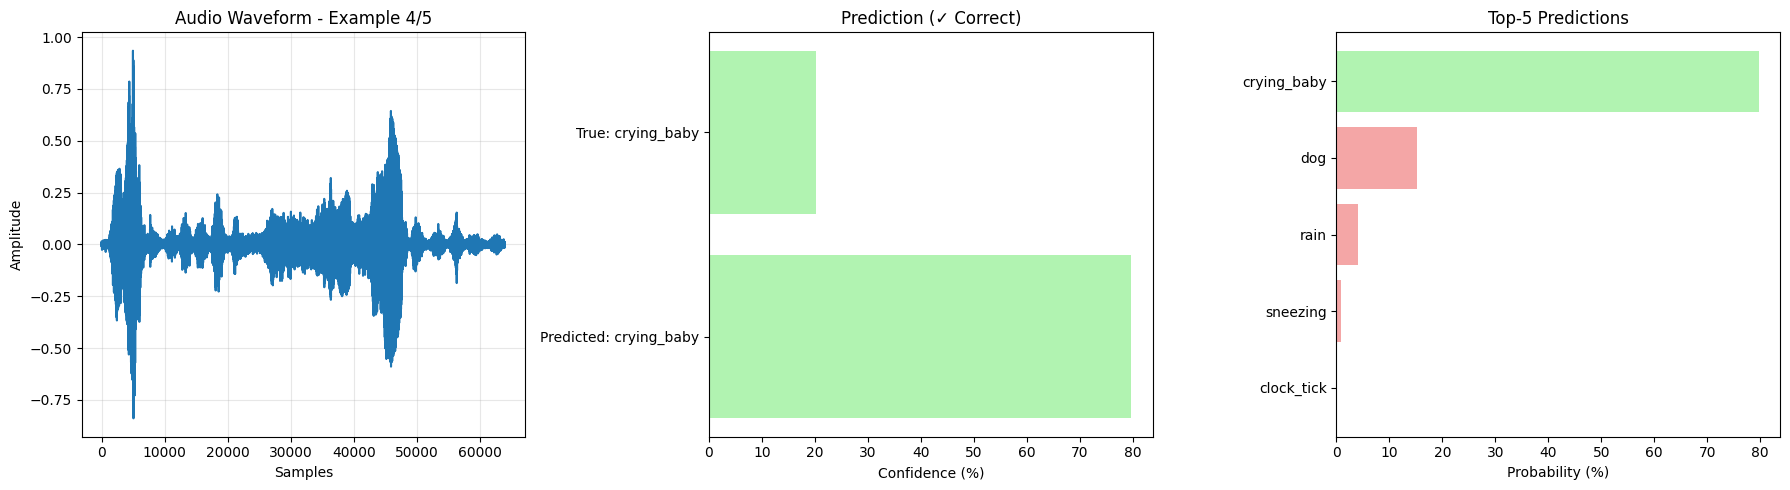

Playing: crying_baby


Prediction: crying_baby (79.74%)
True label: crying_baby
Correct: True


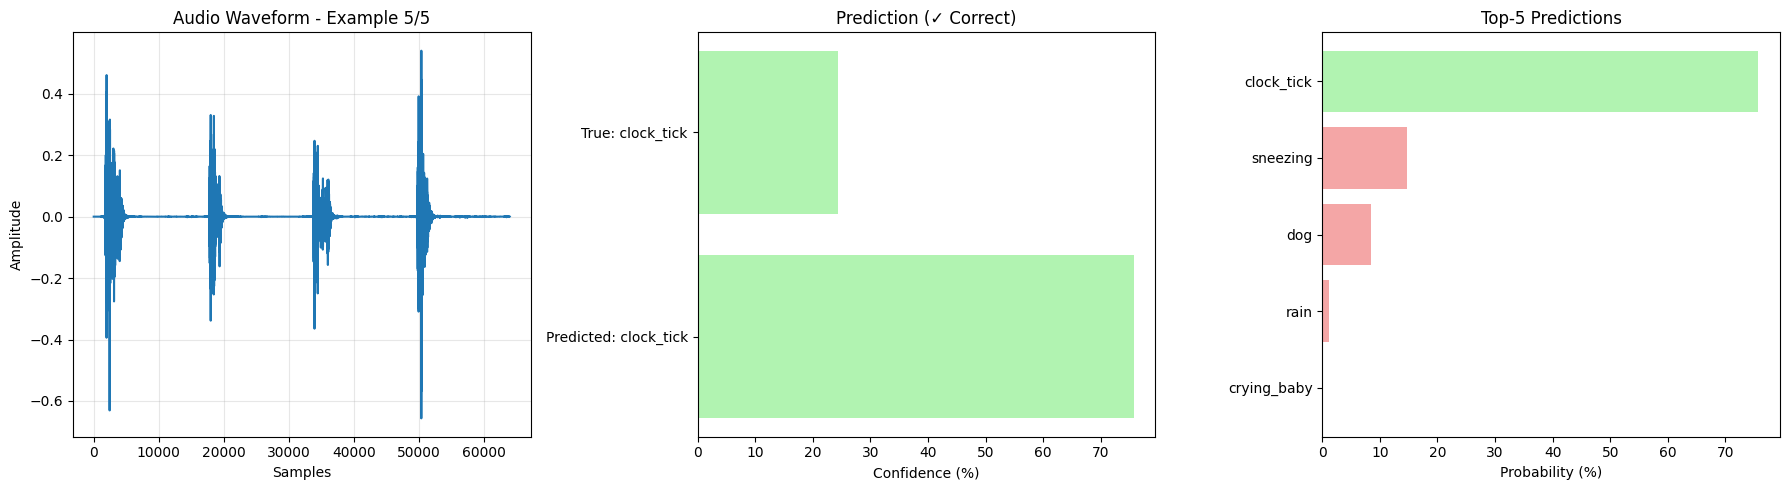

Playing: clock_tick


Prediction: clock_tick (75.70%)
True label: clock_tick
Correct: True
ESC-50 Test Set Evaluation (Fold 5):
Correct: 37/40
Accuracy: 92.50%


In [15]:
class ESC50TestDemo:
    def __init__(self, model, test_dataset, device):
        self.model = model
        self.test_dataset = test_dataset
        self.device = device
        self.classes = test_dataset.classes
        self.model.eval()  # Set to evaluation mode

    def predict_audio(self, signal):
        """Predict class for a single audio signal"""
        with torch.no_grad():
            signal = signal.unsqueeze(0).to(self.device)  # Add batch dimension
            outputs = self.model(signal)
            probabilities = torch.softmax(outputs, dim=1)
            confidence, predicted = torch.max(probabilities, 1)

        return predicted.item(), confidence.item(), probabilities.cpu().numpy()[0]

    def run_interactive_demo(self, num_examples=1):
        """Run interactive demo with random test examples"""
        print("ESC-50 Audio Classification Demo!")
        print("=" * 60)

        # Get random test examples
        indices = np.random.choice(len(self.test_dataset), num_examples, replace=False)

        for i, idx in enumerate(indices):
            # Load audio and true label
            signal, true_label = self.test_dataset[idx]
            true_class = self.classes[true_label]

            # Get prediction
            predicted_idx, confidence, all_probs = self.predict_audio(signal)
            predicted_class = self.classes[predicted_idx]

            # Clear previous output
            # clear_output(wait=True)

            # Create plot
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

            # Plot waveform
            ax1.plot(signal.squeeze().numpy())
            ax1.set_title(f'Audio Waveform - Example {i+1}/{num_examples}')
            ax1.set_xlabel('Samples')
            ax1.set_ylabel('Amplitude')
            ax1.grid(True, alpha=0.3)

            # Plot prediction info
            colors = ['lightcoral', 'lightgreen']
            correct = predicted_class == true_class
            ax2.barh([0, 1], [confidence * 100, (1-confidence) * 100],
                     color=colors[correct], alpha=0.7)
            ax2.set_yticks([0, 1])
            ax2.set_yticklabels([f'Predicted: {predicted_class}',
                               f'True: {true_class}'])
            ax2.set_xlabel('Confidence (%)')
            ax2.set_title(f'Prediction ({"✓ Correct" if correct else "✗ Wrong"})')

            # Plot top-5 predictions
            top5_indices = np.argsort(all_probs)[-5:][::-1]
            top5_classes = [self.classes[idx] for idx in top5_indices]
            top5_probs = all_probs[top5_indices]

            colors = ['lightgreen' if cls == true_class else 'lightcoral' for cls in top5_classes]
            ax3.barh(range(5), top5_probs * 100, color=colors, alpha=0.7)
            ax3.set_yticks(range(5))
            ax3.set_yticklabels(top5_classes)
            ax3.set_xlabel('Probability (%)')
            ax3.set_title('Top-5 Predictions')
            ax3.invert_yaxis()  # Highest probability at top

            plt.tight_layout()
            plt.show()

            # Display audio player
            print(f"Playing: {true_class}")
            display(Audio(signal.squeeze().numpy(), rate=16000))

            print(f"Prediction: {predicted_class} ({confidence:.2%})")
            print(f"True label: {true_class}")
            print(f"Correct: {correct}")
            print("=" * 60)


    def evaluate_test_set(self):
        """Evaluate on entire test set"""
        test_loader = DataLoader(self.test_dataset, batch_size=32, shuffle=False)
        self.model.eval()
        correct = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(self.device), target.to(self.device)
                outputs = self.model(data)
                _, predicted = torch.max(outputs.data, 1)

                total += target.size(0)
                correct += (predicted == target).sum().item()

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(target.cpu().numpy())

        accuracy = 100 * correct / total
        print(f"ESC-50 Test Set Evaluation (Fold 5):")
        print(f"Correct: {correct}/{total}")
        print(f"Accuracy: {accuracy:.2f}%")

        return accuracy, all_predictions, all_labels

# Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create demo
demo = ESC50TestDemo(model, valid_dataset, device)

# Run interactive demo
demo.run_interactive_demo(num_examples=5)

# Evaluate on entire test set
test_accuracy, predictions, true_labels = demo.evaluate_test_set()

### **Create submission to Stepik**

Вам нужно:
* **1 шаг.** сделать предсказания для `test.csv` при помощи лучшей модели
* **2 шаг.** создать `submission.csv` файл с колонкой `category`, положить туда свои предсказания и сохранить файл.

In [16]:
with torch.inference_mode():
  y_test_pred = []
  for signals, _ in test_loader:
      signals = signals.to(device)
      outputs = model(signals)
      _, predicted = torch.max(outputs.data, 1)
      y_test_pred.extend(predicted.cpu().numpy())

y_test_pred = [test_dataset.classes[idx] for idx in y_test_pred]

In [17]:
submission = pd.read_csv("/content/test.csv")
submission['category'] = y_test_pred
submission.to_csv("/content/submission.csv", index=False)

In [18]:
submission.head()

,filename,category
0,5-151085-A-20.wav,crying_baby
1,5-181766-A-10.wav,rain
2,5-187979-A-21.wav,sneezing
3,5-188655-A-10.wav,rain
4,5-193339-A-10.wav,rain


на всякий случай submission здесь - https://gist.github.com/imvladikon/a2375c752582db4b961feb283d2ea316

### **Report**

## Путь экспериментов

### Архитектура модели
Выбрал **4-слойную 1D CNN** для обработки raw waveform (64000 samples @ 16kHz):
- Conv1d(1→32, k=80, s=4) + BN + ReLU + MaxPool(4)
- Conv1d(32→64, k=3) + BN + ReLU + MaxPool(4)
- Conv1d(64→128, k=3) + BN + ReLU + MaxPool(4)
- Conv1d(128→256, k=3) + BN + ReLU + AdaptiveAvgPool1d(1)
- Dropout(0.3) + Linear(256→128) + ReLU + Dropout(0.3) + Linear(128→5)

**Почему такая архитектура:**
- Первый слой с большим kernel (80) извлекает low-level features из сырого сигнала
- BatchNorm для стабилизации обучения
- MaxPool для уменьшения размерности
- AdaptiveAvgPool для глобальных признаков
- Dropout (0.3) для регуляризации на маленьком датасете (120 samples)

### Эксперименты (5 итераций)

| # | Конфигурация | Valid Acc | Вывод |
|---|-------------|-----------|-------|
| 1 | **Baseline CNN** (простая архитектура + базовые augmentations) | **80.4% (acc_val_avg)** | ✅ Лучший результат |
| 2 | Enhanced Augmentation (+ time shift, cutout, сильнее noise) | 80.8% | по сути не дало особого прироста |
| 3 | LR Scheduling (lr=0.0005, scheduler, weight decay) | 80.8% | Замедлило сходимость |
| 4 | Deeper CNN (512 channels вместо 256) | 77.5% | Переобучение на 120 samples |
| 5 | Batch Size 32 (вместо 16) | 80.1% | Чуть хуже для малого датасета (но сторого говоря это ни о чем не говорит в целом) |

### Что сработало
- **Простая архитектура** — данных мало, нужна простая сетка с небольшим числом параметров, чтобы успеть чему-то "научиться", по моему достаточно 4 слоев для 120 примерчиков
- **Базовые augmentations** — Gaussian noise (0.005) + Volume (0.8-1.2)
- **Batch size 16** — оптимален для малого датасета
- **Early stopping** — предотвращает переобучение (сделал в коде в скрипте у себя, и было лениво переделывать ноутбук, поскольку плюс минус тоже самое получилось)
- **Dropout 0.3** — критичен для регуляризации

### Что не сработало
- **Более глубокие модели** (512 channels) — переобучение
- **Сложные augmentations** (time shift, cutout) — не добавили точности
- **Большие батчи (32)** — хуже сходимость
- **LR scheduling** с низким lr — слишком медленно

### Итоговые результаты
- **Train Accuracy (max)** =  96.66666666666667   
- **Valid Accuracy (max)** =  92.5   
- **Train Accuracy (avg)** =  85.46666666666668   
- **Valid Accuracy (avg)** =  80.4   

- **Превышает порог 75%**: да. значит, пойдет:)


**Вывод**: На маленьких датасетах (100-200 samples) простота > сложность. Фокус на качественном preprocessing и умеренной регуляризации важнее "глубины" модели. большая сетка с большим числом параметром - есть риск переобучения (за скобками оставляем сетки с предобученными весами)